### Problem Statement

### Import and add dependncy

In [ ]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
import os#Work with filepaths
import cv2#Open Cv
import mediapipe as mp

### Taking keypoints using mediapipe holistics

In [2]:
#Setting up mediapipe holistic's
#Media pipe holistic to make detection
#Media pipe drawing will draw those points
#We will create them as function to easily access them
mp_holistic=mp.solutions.holistic#Holistic model
mp_drawing=mp.solutions.drawing_utils#Drawing the utilites

In [3]:
#Creating mediapipe detection function
def mediapipe_detection(image,model):
    #To the function we pass image and holistic model for detection
    #So when wwe get feed from opencv it is of format bgr(blue,green,red)
    #For detection we need them to be rgb we will change that using opencv
    #Here image is the frames from opencv
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#Color conversion
    image.flags.writeable=False#Image is no longer writeable
    results=model.process(image)#Making detection
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)#Color conversion
    image.flags.writeable=True#Image is writeable again
    return image,results #Returning the results

In [4]:
#To draw the points onto the image
def draw_landmarks(image,results):
    #drawing landmarks using mp_drawings.draw_landmark
    #For Face
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    #For Pose
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    #For Left Hand
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    #For Right Hand
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    #Pose landmark shows what landmark connected to other landmarks

In [34]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [5]:
#Formatted draw style landmarks
def draw_styled_landmarks(image,result):
    #For Face
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION
                              #color landmark
                             ,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #For Pose
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    #For Left Hand
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    #For Right Hand
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS
                             #color landmark
                             ,mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4)
                             #color connections
                             ,mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [55]:
#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#It checks wheather we are accessing or not
        #Read feed
        ret,frame=cap.read()#It reads our frames
        
        #Make detections
        image,results=mediapipe_detection(frame,holistic)
        
        #Drwing Landmarks
        draw_styled_landmarks(image,results)
        
        #To showw to screen
        #Rendering
        cv2.imshow("OpenCv Feed",image)

        #To Exit o break the feed
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

In [56]:
len(results.face_landmarks.landmark)

468

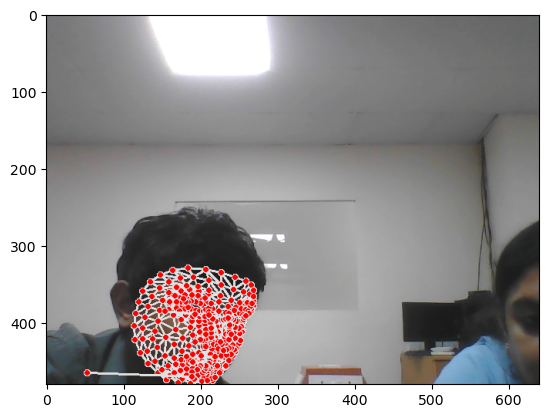

In [10]:
draw_landmarks(frame,results)
plt.imshow(frame)
#This show last frame captured
#Color Conversion
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
draw_styled_landmarks(frame,results)
plt.imshow(frame)
#This show last frame captured
#Color Conversion
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

### Extract Keypoints

In [57]:
len(results.face_landmarks.landmark)

468

In [6]:
#Obtaining values using list comprenhension
def extract_keypoints(results):
    #Pose
    # If else statement returns zero array if results is empty
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    #We need to flatten it to get in one array
    #Left hand
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    #Right hand
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    #Face
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    #returning the values in a single concatenated array
    return np.concatenate([pose,face,lh,rh])

In [36]:
extract_keypoints(results).shape

(1662,)

### Setup folders for collection

In [7]:
#Path for exported data,Numpyarray
DATA_PATH=os.path.join('MP_data')

#Actions we are going to try to detect
actions=np.array(['hello','thanks','loveyou'])
#We use 30 different frames of data to detect actions
#30 videos worth of data
no_sequences=30
#Videos are going to be length of 30 frames
sequence_length=30

In [ ]:
#Creating folders to save the data
for action in actions:
    for sequence in range(no_sequences):
        try:
            #makedirs will create sub folders
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
#We will create 30 folders for every actions

### Collecting data for training and testing

In [ ]:
#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    #Loop through actions:hello,thanks etc
    for action in actions:
        #Loop through videos each action 30 videos
        for sequence in range(no_sequences):
            #Loop through each frame per video 30 frames
            for frame_num in range(sequence_length):
                #Read feed
                ret,frame=cap.read()#It reads our frames

                #Make detections
                image,results=mediapipe_detection(frame,holistic)

                #Drwing Landmarks
                draw_styled_landmarks(image,results)
                    
                #Applying wait logic 
                #To give break between videos and say to user what video he is at
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECION',(120,200),
                                   cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,f'Collecting frames for {action} Video number {sequence}'
                                    ,(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)#This waits for 2 second after every video captured
                    
                else:
                    cv2.putText(image,f'Collecting frames for {action} Video number {sequence}'
                                    ,(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)

                #Extracting the keypoints
                keypoints=extract_keypoints(results)
                #Saving the extracted keypoints
                #Path to save the key points
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                #Saving keypoints
                np.save(npy_path,keypoints)
                    
                #To show to screen
                #Rendering
                cv2.imshow("OpenCv Feed",image)

                #To Exit o break the feed
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

In [ ]:
#To destroy open cv in middle
cap.release()#It releases the webcam
cv2.destroyAllWindows()#Destroy the cv window

### Preprocessing Data and Creating Labels

In [8]:
#To split data for training and testing 
from sklearn.model_selection import train_test_split
#To convert data into one encoded data
from tensorflow.keras.utils import to_categorical

In [9]:
#Creating label map
label_map={label:num for num,label in enumerate(actions)}

In [10]:
label_map
#We created dictionary for labels with set of id

{'hello': 0, 'thanks': 1, 'loveyou': 2}

In [ ]:
#In preprocessing we put every frame np file in single one

In [11]:
#Creating 2 blank arrays
sequences,labels=[],[]
#here sequences represent our feature data(x) and labels represent labels(y)
#Going through our actions
for action in actions:
    #Going through our 30 videos
    for sequence in range(no_sequences):
        #Creating a blank array window
        window=[]
        #Going through each frames
        for frame_num in range(sequence_length):
            #Loading up the respective frame using np.load()
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),f"{frame_num}.npy"))
            #Adding the value to the window array
            print(res)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

[ 0.53316677  0.51246411 -1.15837407 ...  0.          0.
  0.        ]
[ 0.53625101  0.56368196 -1.19923615 ...  0.39377213  0.29293865
 -0.01883467]
[ 0.53835422  0.57232577 -1.19654667 ...  0.39214599  0.29512265
 -0.01889087]
[ 0.53891051  0.57860911 -1.19363427 ...  0.39359024  0.29590318
 -0.01519801]
[ 0.53914207  0.58111727 -1.1892035  ...  0.39277944  0.29678228
 -0.01560478]
[ 0.53749025  0.58275443 -1.28213179 ...  0.3922863   0.29380634
 -0.01977629]
[ 0.53303921  0.58212948 -1.29525244 ...  0.39375058  0.29127747
 -0.01606657]
[ 0.53024435  0.58285767 -1.27013588 ...  0.38737106  0.29633319
 -0.01552198]
[ 0.52779204  0.58106345 -1.31916416 ...  0.36694098  0.27612159
 -0.01156615]
[ 0.5271154   0.5809269  -1.30439985 ...  0.36535716  0.27915788
 -0.01530807]
[ 0.52289212  0.57910252 -1.28774858 ...  0.          0.
  0.        ]
[ 0.51913655  0.57603228 -1.27715421 ...  0.          0.
  0.        ]
[ 0.51505107  0.57465935 -1.27373374 ...  0.          0.
  0.        ]
[ 0.5

[ 0.57075179  0.6106866  -1.01679277 ...  0.18695357  0.08197483
 -0.02370854]
[ 0.57274979  0.61227262 -1.02261615 ...  0.17146933  0.08021271
 -0.03438921]
[ 0.57371557  0.61333847 -1.02317786 ...  0.17067966  0.07948662
 -0.03498796]
[ 0.57357532  0.61434406 -0.99967462 ...  0.16866589  0.07991242
 -0.03809527]
[ 0.57341915  0.61514032 -0.98801267 ...  0.16903067  0.07957533
 -0.03508253]
[ 0.57251489  0.61543679 -0.95500815 ...  0.16591035  0.08016814
 -0.04130323]
[ 0.57264751  0.61621052 -0.95683706 ...  0.16612053  0.08095922
 -0.03678876]
[ 0.57323849  0.61684418 -0.97886074 ...  0.17160884  0.08602078
 -0.02737728]
[ 0.57362729  0.61730039 -0.98343927 ...  0.16990638  0.08583809
 -0.02855948]
[ 0.57364315  0.61857015 -0.96043426 ...  0.18695514  0.09460928
 -0.02605205]
[ 0.57065231  0.62471426 -1.00629437 ...  0.20224059  0.11087473
 -0.02659345]
[ 0.56880832  0.62821376 -1.01836085 ...  0.20398095  0.11311413
 -0.02128465]
[ 0.56784433  0.63039702 -1.02266145 ...  0.20398334

[ 0.45772523  0.60889    -0.97800606 ...  0.          0.
  0.        ]
[ 0.45832974  0.60922945 -1.00059152 ...  0.          0.
  0.        ]
[ 0.45882177  0.60943902 -1.01145196 ...  0.          0.
  0.        ]
[ 0.45883411  0.60937905 -1.00419092 ...  0.          0.
  0.        ]
[ 0.45885134  0.60922325 -1.00015342 ...  0.          0.
  0.        ]
[ 0.45887199  0.60854596 -0.96523649 ...  0.          0.
  0.        ]
[ 0.45889145  0.60803425 -0.94741982 ...  0.          0.
  0.        ]
[ 0.45792311  0.60786784 -0.92175293 ...  0.          0.
  0.        ]
[ 0.45792651  0.60811216 -0.91339481 ...  0.          0.
  0.        ]
[ 0.45495829  0.60010892 -0.91366088 ...  0.          0.
  0.        ]
[ 0.45231181  0.59676582 -0.9544341  ...  0.          0.
  0.        ]
[ 0.45061225  0.59444851 -0.97300398 ...  0.          0.
  0.        ]
[ 0.44910589  0.5915795  -0.9463501  ...  0.          0.
  0.        ]
[ 0.44877881  0.58922172 -0.94579047 ...  0.          0.
  0.        ]
[ 0.44

[ 0.45483765  0.61468387 -0.85659027 ...  0.          0.
  0.        ]
[ 0.45478612  0.61463439 -0.76319057 ...  0.          0.
  0.        ]
[ 0.45474333  0.61456209 -0.74379402 ...  0.          0.
  0.        ]
[ 0.45474306  0.61321193 -0.78908122 ...  0.          0.
  0.        ]
[ 0.45488471  0.61290765 -0.78830719 ...  0.          0.
  0.        ]
[ 0.45576102  0.61395907 -0.91060078 ...  0.          0.
  0.        ]
[ 0.45610958  0.6174342  -0.9657461  ...  0.          0.
  0.        ]
[ 0.45599523  0.61977994 -0.81946772 ...  0.          0.
  0.        ]
[ 0.45586252  0.6212644  -0.78788555 ...  0.          0.
  0.        ]
[ 0.45524606  0.62185413 -0.95752513 ...  0.          0.
  0.        ]
[ 0.45475179  0.6222446  -0.97206467 ...  0.          0.
  0.        ]
[ 0.45385957  0.62287438 -0.93722266 ...  0.          0.
  0.        ]
[ 0.45367464  0.62335294 -0.79649591 ...  0.          0.
  0.        ]
[ 0.45372921  0.62283611 -0.80080587 ...  0.          0.
  0.        ]
[ 0.45

[ 0.54144937  0.64797252 -1.24805856 ...  0.13103583  0.05508573
 -0.02020923]
[ 0.54130954  0.64640683 -1.25246763 ...  0.13013181  0.05786908
 -0.02108636]
[ 0.54132432  0.64201587 -1.24368215 ...  0.15453091  0.06528684
 -0.01630223]
[ 0.54082388  0.63892615 -1.22575116 ...  0.21956952  0.09830581
  0.01720495]
[ 0.53994673  0.63899511 -1.10272849 ...  0.29590014  0.16222076
 -0.00727867]
[ 0.53964859  0.63880944 -1.02084541 ...  0.30376047  0.17396475
 -0.00926263]
[ 0.55587333  0.63178819 -1.10703194 ...  0.44927686  0.30281478
 -0.03002459]
[ 0.56270415  0.62837589 -1.1111691  ...  0.44788745  0.30117443
 -0.02644309]
[ 0.5661298   0.62494838 -1.10494804 ...  0.45173264  0.30154172
 -0.0253772 ]
[ 0.57032293  0.62365896 -1.09290195 ...  0.45101199  0.30151454
 -0.02504738]
[ 0.57165343  0.62287098 -1.11017239 ...  0.44753742  0.29641229
 -0.01895674]
[ 0.57309043  0.62245846 -1.09819579 ...  0.41887426  0.26113364
 -0.0146394 ]
[ 0.57382029  0.62189698 -1.04475152 ...  0.38053477

[ 0.56246209  0.64829177 -1.03654253 ...  0.19057429  0.11302349
 -0.02013486]
[ 0.56220442  0.64918143 -1.09259784 ...  0.14331664  0.10020095
 -0.02607271]
[ 0.56195575  0.64987004 -1.10228431 ...  0.14210063  0.093033
 -0.01898464]
[ 0.56144249  0.64849168 -1.09994626 ...  0.11988059  0.07735804
 -0.02776139]
[ 0.56103623  0.6475845  -1.09941888 ...  0.11773133  0.08235233
 -0.02924127]
[ 0.56025225  0.64750654 -1.12154436 ...  0.11104839  0.0774036
 -0.03825791]
[ 0.55976099  0.64776498 -1.11400604 ...  0.11050538  0.07666375
 -0.04519425]
[ 0.55976319  0.64772636 -1.11186481 ...  0.1105725   0.07712859
 -0.04528148]
[ 0.55975854  0.64772153 -1.11238658 ...  0.10978578  0.07826532
 -0.04098546]
[ 0.55973893  0.64748389 -1.11585343 ...  0.11404537  0.07878819
 -0.03902915]
[ 0.55958211  0.64746308 -1.13013828 ...  0.11524928  0.08132611
 -0.03848397]
[ 0.55937505  0.64742196 -1.14027798 ...  0.1149895   0.08212207
 -0.04187998]
[ 0.55878615  0.64737147 -1.11386287 ...  0.11548482  0

[ 0.44690031  0.66481441 -0.65725946 ...  0.          0.
  0.        ]
[ 0.44692391  0.66495705 -0.66955155 ...  0.          0.
  0.        ]
[ 0.44681025  0.66480541 -0.72116071 ...  0.          0.
  0.        ]
[ 0.44660825  0.66475213 -0.72138458 ...  0.          0.
  0.        ]
[ 0.44623089  0.66514176 -0.68254483 ...  0.          0.
  0.        ]
[ 0.445939    0.6651569  -0.67257464 ...  0.          0.
  0.        ]
[ 0.44491419  0.66521603 -0.67833465 ...  0.          0.
  0.        ]
[ 0.44446605  0.66574275 -0.68031669 ...  0.          0.
  0.        ]
[ 0.44419593  0.66621214 -0.68314904 ...  0.          0.
  0.        ]
[ 0.44410887  0.67454726 -0.73133153 ...  0.          0.
  0.        ]
[ 0.44387323  0.67885488 -0.73839581 ...  0.          0.
  0.        ]
[ 0.4431015   0.68078959 -0.63337028 ...  0.          0.
  0.        ]
[ 0.4427197   0.6819309  -0.61274993 ...  0.          0.
  0.        ]
[ 0.44257841  0.6817891  -0.70533448 ...  0.          0.
  0.        ]
[ 0.44

[ 0.55514026  0.66024661 -1.32729626 ...  0.20245028  0.13580553
 -0.0225293 ]
[ 0.55540174  0.66129756 -1.37858164 ...  0.14167294  0.13071758
 -0.0263353 ]
[ 0.55554527  0.66208065 -1.37883162 ...  0.1414641   0.1197181
 -0.02525413]
[ 0.55567658  0.66209882 -1.41510308 ...  0.1224553   0.10768124
 -0.03858181]
[ 0.55539763  0.66197556 -1.4564898  ...  0.11984205  0.10449675
 -0.05048067]
[ 0.55254364  0.66190535 -1.49313331 ...  0.12275182  0.10685782
 -0.04888466]
[ 0.55159217  0.66213071 -1.48848915 ...  0.1226112   0.10690923
 -0.05697135]
[ 0.55073178  0.66222078 -1.50808311 ...  0.12471714  0.10929851
 -0.05009797]
[ 0.55069667  0.66197169 -1.53686631 ...  0.12396352  0.10911652
 -0.05210405]
[ 0.55073094  0.66193706 -1.5006423  ...  0.1265209   0.1101996
 -0.05654495]
[ 0.55078334  0.66186059 -1.49974942 ...  0.12654914  0.10883775
 -0.05279112]
[ 0.55080533  0.66168314 -1.48977292 ...  0.12814215  0.11249964
 -0.05033324]
[ 0.55132252  0.66112536 -1.45236921 ...  0.13469496  

[ 0.52271575  0.48328403 -0.61547035 ...  0.35646817  0.63962555
 -0.1153204 ]
[ 0.52303737  0.48376268 -0.61594987 ...  0.35732663  0.63810205
 -0.11451515]
[ 0.52304626  0.48443452 -0.62538981 ...  0.36065298  0.63782501
 -0.11502176]
[ 0.52330381  0.49038774 -0.62514764 ...  0.52205312  0.65376115
 -0.04181554]
[ 0.52373302  0.49290773 -0.56535697 ...  0.52010757  0.65357029
 -0.04071765]
[ 0.52387255  0.49491045 -0.57700241 ...  0.5214783   0.6545645
 -0.03670381]
[ 0.52606833  0.49559957 -0.59261322 ...  0.52186203  0.65421921
 -0.03969201]
[ 0.52651668  0.49598816 -0.58382571 ...  0.52004319  0.65405315
 -0.03774003]
[ 0.52745545  0.49613664 -0.58587432 ...  0.52036273  0.6543771
 -0.04603042]
[ 0.52803576  0.4963046  -0.6046437  ...  0.51994884  0.65636927
 -0.04479751]
[ 0.52814716  0.49638385 -0.55521506 ...  0.51782453  0.65597105
 -0.0407505 ]
[ 0.52854675  0.49621546 -0.58517122 ...  0.51225317  0.65980977
 -0.04884457]
[ 0.52745211  0.49645916 -0.64562047 ...  0.50371921  

[ 0.49564791  0.50679451 -0.93897378 ...  0.39998195  0.75662678
 -0.08805104]
[ 0.49567968  0.5123595  -0.8199383  ...  0.4067505   0.74596602
 -0.09546074]
[ 0.49636966  0.51965559 -0.68728137 ...  0.41434258  0.74088711
 -0.08130735]
[ 0.49627614  0.5271008  -0.63114536 ...  0.47960332  0.66226345
 -0.04878251]
[ 0.4962303   0.52940136 -0.56052959 ...  0.48002088  0.66361672
 -0.04843711]
[ 0.49751019  0.52866799 -0.50975901 ...  0.48276377  0.66200125
 -0.04512597]
[ 0.49783787  0.52773309 -0.5333727  ...  0.48330683  0.66168821
 -0.04612003]
[ 0.49793854  0.52705282 -0.54728109 ...  0.48284799  0.6613698
 -0.04642714]
[ 0.49799472  0.52743816 -0.55834287 ...  0.48404452  0.66244984
 -0.04652463]
[ 0.49801487  0.52721673 -0.58762681 ...  0.48638159  0.6617192
 -0.04562908]
[ 0.49829054  0.52692157 -0.55996162 ...  0.4837366   0.66657954
 -0.04945939]
[ 0.49852529  0.52670467 -0.55393267 ...  0.48413488  0.66798604
 -0.04755393]
[ 0.49788159  0.52540702 -0.57162368 ...  0.47481963  

[ 0.51076019  0.50081956 -1.02848029 ...  0.32105097  0.89968336
 -0.11696612]
[ 0.51185906  0.50089478 -1.03940725 ...  0.32651338  0.89896709
 -0.12018821]
[ 0.51246417  0.5015617  -1.0802685  ...  0.32210094  0.89980906
 -0.12135945]
[ 0.51288086  0.50160116 -1.02647734 ...  0.32532153  0.89781165
 -0.15090223]
[ 0.51295149  0.50165302 -0.93908042 ...  0.32054034  0.89749992
 -0.10889862]
[ 0.51299399  0.50161612 -0.90779179 ...  0.32476255  0.90123749
 -0.13574217]
[ 0.51301259  0.50160569 -0.83533418 ...  0.31834623  0.89131761
 -0.12962763]
[ 0.51301271  0.50195241 -0.98498309 ...  0.32722911  0.89818686
 -0.13324355]
[ 0.5138095   0.50195616 -0.63132262 ...  0.50116217  0.6531952
 -0.04463471]
[ 0.51585191  0.50344437 -0.64550483 ...  0.50021231  0.64981461
 -0.04610422]
[ 0.51809931  0.5045287  -0.6705972  ...  0.50092191  0.65040946
 -0.04409488]
[ 0.51949328  0.50820452 -0.63646567 ...  0.5013237   0.64881206
 -0.04453862]
[ 0.51982701  0.51088053 -0.6713652  ...  0.50160611 

[ 0.52683103  0.49697405 -1.09611475 ...  0.34569165  0.85688686
 -0.13053709]
[ 0.5273174   0.49689114 -1.21248555 ...  0.34178925  0.8563081
 -0.13470253]
[ 0.52730101  0.49731877 -1.17931378 ...  0.3457436   0.86006606
 -0.12115798]
[ 0.52716148  0.49771234 -1.14020252 ...  0.34179142  0.85733503
 -0.1298099 ]
[ 0.52715337  0.49879456 -1.06630301 ...  0.35127017  0.86292619
 -0.12041081]
[ 0.52714539  0.49950975 -1.04536092 ...  0.35124898  0.85845214
 -0.1358736 ]
[ 0.52753133  0.50125772 -1.06710899 ...  0.34510073  0.85504037
 -0.13371378]
[ 0.5276407   0.50160873 -1.04003978 ...  0.35358393  0.86147076
 -0.13754137]
[ 0.52760804  0.50187093 -1.052724   ...  0.35678834  0.85269839
 -0.12224144]
[ 0.52749622  0.5038377  -1.04892468 ...  0.35211551  0.85453326
 -0.1427718 ]
[ 0.52739751  0.50525934 -1.04631066 ...  0.35531968  0.85272384
 -0.12471347]
[ 0.52866322  0.50672537 -1.04459894 ...  0.35888845  0.84973359
 -0.12448002]
[ 0.52904165  0.50911003 -1.03325081 ...  0.35639822 

[ 0.41011852  0.56729698 -0.47727814 ...  0.3880713   0.69676483
 -0.0685715 ]
[ 0.40841469  0.57137382 -0.49447346 ...  0.38774395  0.69701755
 -0.06137607]
[ 0.40759602  0.57326788 -0.49736267 ...  0.38644964  0.69667923
 -0.069671  ]
[ 0.40255895  0.57124168 -0.56976104 ...  0.37147376  0.70630765
 -0.03278529]
[ 0.39460415  0.57060516 -0.72414672 ...  0.          0.
  0.        ]
[ 0.39347667  0.56915867 -1.14004493 ...  0.          0.
  0.        ]
[ 0.39189294  0.56833369 -1.11958337 ...  0.          0.
  0.        ]
[ 0.39599466  0.56661832 -0.72563493 ...  0.          0.
  0.        ]
[ 0.39786765  0.56238002 -0.52107871 ...  0.08043747  0.83790904
 -0.00875162]
[ 0.39966634  0.56047195 -0.41489473 ...  0.08289254  0.95653886
  0.02577098]
[ 0.40046954  0.55629104 -0.40393853 ...  0.02033576  0.93625975
  0.00279302]
[ 0.40095073  0.5547657  -0.39576635 ... -0.00390439  0.90978944
  0.06033017]
[ 0.40113968  0.55360794 -0.38963655 ...  0.02676831  0.9535746
 -0.0270041 ]
[ 0.40

[ 0.63875324  0.56802469 -0.46284208 ...  0.72411972  0.70023978
 -0.02214772]
[ 0.66345268  0.56852984 -0.5832774  ...  0.62513369  0.69197083
  0.0340633 ]
[ 0.66836309  0.56820679 -0.49981123 ...  0.62698287  0.68949139
  0.03041513]
[ 0.67105711  0.57088554 -0.42702365 ...  0.62701964  0.68830705
  0.02865425]
[ 0.67245233  0.57242459 -0.40009958 ...  0.62647772  0.69033396
  0.02768983]
[ 0.67221224  0.57288653 -0.39754641 ...  0.62511909  0.69033229
  0.03555972]
[ 0.673702    0.57428545 -0.34562749 ...  0.62914312  0.68890405
  0.02345523]
[ 0.67262268  0.57457429 -0.359918   ...  0.63591051  0.68853426
  0.02954871]
[ 0.67215544  0.57448286 -0.36135411 ...  0.63651347  0.68337339
  0.0245745 ]
[ 0.67336953  0.57283604 -0.3534227  ...  0.6502459   0.68155152
  0.01567263]
[ 0.67282659  0.57047307 -0.68952763 ...  0.66963029  0.69693494
  0.00331858]
[ 0.67160386  0.57047653 -0.62008083 ...  0.69184649  0.69014233
 -0.00567879]
[ 0.67094707  0.57047421 -0.62657046 ...  0.70039964

[ 0.54813737  0.52814806 -1.00632322 ...  0.43406108  0.87452334
 -0.13261086]
[ 0.54773706  0.52834076 -0.99783546 ...  0.42936853  0.8748104
 -0.1305912 ]
[ 0.54771858  0.53035414 -1.04567289 ...  0.42033377  0.87917501
 -0.14033188]
[ 0.54861641  0.53225499 -1.06669664 ...  0.42919707  0.87938303
 -0.13573359]
[ 0.54927063  0.53296149 -1.15213513 ...  0.42931709  0.87309974
 -0.13255624]
[ 0.54975837  0.5335387  -1.17302108 ...  0.42765617  0.87421942
 -0.11655456]
[ 0.54983503  0.53324187 -1.21824098 ...  0.42683804  0.86303598
 -0.11719088]
[ 0.54114079  0.53053689 -0.67572916 ...  0.5110423   0.64682204
 -0.04382719]
[ 0.53548139  0.52620023 -0.67602628 ...  0.50938016  0.64544725
 -0.04369412]
[ 0.53587568  0.51961482 -0.69412351 ...  0.51111335  0.644445
 -0.04319527]
[ 0.53644639  0.51531947 -0.702052   ...  0.51203597  0.6426478
 -0.04445318]
[ 0.53693891  0.51347238 -0.73967987 ...  0.51163357  0.64202088
 -0.04656896]
[ 0.53731281  0.51403409 -0.76715821 ...  0.51169246  0.

[ 0.53621757  0.5077188  -0.66398513 ...  0.48687798  0.67401856
 -0.06107344]
[ 0.53702033  0.50666839 -0.96237767 ...  0.46037543  0.71095771
 -0.06061579]
[ 0.53977031  0.50484306 -0.96829736 ...  0.42279401  0.77466822
 -0.07510121]
[ 0.54008669  0.5043304  -0.93915194 ...  0.42506203  0.77227443
 -0.07451477]
[ 0.54107535  0.50371897 -1.02634466 ...  0.3888213   0.84338707
 -0.09848365]
[ 0.54168332  0.50377727 -1.02311659 ...  0.37630826  0.87852454
 -0.10275236]
[ 0.54251748  0.50381064 -1.01427901 ...  0.37303692  0.87950635
 -0.09897628]
[ 0.54300809  0.50388217 -1.03366327 ...  0.37601879  0.8997975
 -0.11168022]
[ 0.54299563  0.50568593 -1.16938925 ...  0.36683652  0.90882862
 -0.11030781]
[ 0.54299134  0.50805026 -1.07101178 ...  0.37554261  0.90938747
 -0.10996087]
[ 0.54298711  0.50948095 -1.04022372 ...  0.36791983  0.90929574
 -0.11266225]
[ 0.54306901  0.51145577 -1.03492498 ...  0.37713799  0.91278332
 -0.1093924 ]
[ 0.54428172  0.51535201 -1.01958919 ...  0.37663651 

[ 0.60410583  0.64038086 -1.09603214 ...  0.          0.
  0.        ]
[ 0.60611713  0.64031881 -1.00953972 ...  0.          0.
  0.        ]
[ 0.63173431  0.63619518 -1.03688788 ...  0.          0.
  0.        ]
[ 0.65009409  0.63187158 -1.03202128 ...  0.20204583  0.30884981
 -0.03524438]
[ 0.65520626  0.63103408 -1.03917193 ...  0.20316938  0.30877864
 -0.04160776]
[ 0.65557081  0.63071734 -1.06429136 ...  0.23249309  0.24492934
 -0.02887784]
[ 0.65718091  0.62881792 -1.04349506 ...  0.25359681  0.19875729
 -0.02018792]
[ 0.6598953   0.62692201 -1.02938187 ...  0.26759908  0.18166712
 -0.02892439]
[ 0.6605798   0.62624943 -1.02720666 ...  0.27413523  0.17411101
 -0.03475198]
[ 0.66128236  0.62365323 -0.96583712 ...  0.27789518  0.17030741
 -0.03107026]
[ 0.66082227  0.62317973 -0.9354642  ...  0.27838364  0.17012781
 -0.02920255]
[ 0.66171306  0.62250227 -0.91398811 ...  0.27969706  0.16753183
 -0.03312567]
[ 0.66226268  0.62251025 -0.94541758 ...  0.28211486  0.16399862
 -0.0291992

[ 0.40685487  0.60549831 -0.78649622 ...  0.          0.
  0.        ]
[ 0.40793008  0.60588586 -0.8075698  ...  0.          0.
  0.        ]
[ 0.40887895  0.60619199 -0.81992579 ...  0.          0.
  0.        ]
[ 0.40879908  0.60739052 -0.78814775 ...  0.          0.
  0.        ]
[ 0.40823764  0.60735738 -0.80925381 ...  0.          0.
  0.        ]
[ 0.40822974  0.60610479 -0.68210256 ...  0.          0.
  0.        ]
[ 0.40817291  0.60508007 -0.63076037 ...  0.          0.
  0.        ]
[ 0.40811443  0.60431308 -0.63134795 ...  0.          0.
  0.        ]
[ 0.40913233  0.6035971  -0.65324914 ...  0.          0.
  0.        ]
[ 0.40916094  0.6026001  -0.75414979 ...  0.          0.
  0.        ]
[ 0.40922636  0.60131204 -0.7851361  ...  0.          0.
  0.        ]
[ 0.40985805  0.60083085 -0.77162111 ...  0.          0.
  0.        ]
[ 0.41064262  0.6007787  -0.75847644 ...  0.          0.
  0.        ]
[ 0.41142759  0.60078442 -0.75200337 ...  0.          0.
  0.        ]
[ 0.41

[ 0.46561831  0.59377503 -0.78840971 ...  0.          0.
  0.        ]
[ 0.46585497  0.59345144 -0.75369948 ...  0.          0.
  0.        ]
[ 0.46588627  0.59280586 -0.79884857 ...  0.          0.
  0.        ]
[ 0.46589226  0.59240657 -0.8186776  ...  0.          0.
  0.        ]
[ 0.46444029  0.59207064 -0.80119991 ...  0.          0.
  0.        ]
[ 0.46345782  0.59180963 -0.79197174 ...  0.          0.
  0.        ]
[ 0.46198225  0.59180248 -0.78681427 ...  0.          0.
  0.        ]
[ 0.46310076  0.59286869 -0.87015516 ...  0.          0.
  0.        ]
[ 0.46378404  0.59353387 -0.89744663 ...  0.          0.
  0.        ]
[ 0.46620241  0.59353006 -0.72994411 ...  0.          0.
  0.        ]
[ 0.46816739  0.59351188 -0.71266091 ...  0.          0.
  0.        ]
[ 0.46790871  0.59349442 -0.61062181 ...  0.          0.
  0.        ]
[ 0.46770787  0.59344065 -0.58316267 ...  0.          0.
  0.        ]
[ 0.4665094   0.59335285 -0.61905134 ...  0.          0.
  0.        ]
[ 0.46

[ 0.62111205  0.60563928 -1.09528482 ...  0.          0.
  0.        ]
[ 0.62983769  0.60706437 -1.14523351 ...  0.          0.
  0.        ]
[ 0.63723928  0.60709828 -0.98268783 ...  0.          0.
  0.        ]
[ 0.645733    0.60737479 -1.02400184 ...  0.          0.
  0.        ]
[ 0.65012372  0.60693091 -1.04723275 ...  0.18370004  0.37493914
 -0.03660484]
[ 0.64901584  0.60584819 -1.08688092 ...  0.20708567  0.28698543
 -0.04194676]
[ 0.64902818  0.6041854  -1.09814858 ...  0.20703132  0.2863974
 -0.04617352]
[ 0.64866716  0.60419339 -1.13000941 ...  0.22514373  0.2453606
 -0.0337116 ]
[ 0.64876258  0.60227257 -1.16488457 ...  0.2439888   0.21610512
 -0.03437939]
[ 0.6502586   0.59977746 -1.12444937 ...  0.25678906  0.19745015
 -0.03197705]
[ 0.65105259  0.5982098  -1.08337307 ...  0.25723031  0.19671303
 -0.03241602]
[ 0.65106189  0.59808576 -1.08669627 ...  0.26935855  0.18981747
 -0.0290281 ]
[ 0.65092111  0.59777635 -1.08154953 ...  0.27898219  0.17887713
 -0.02697622]
[ 0.650

[ 0.4572584   0.59444445 -0.57874513 ...  0.          0.
  0.        ]
[ 0.45711112  0.59480494 -0.61404783 ...  0.          0.
  0.        ]
[ 0.45687026  0.59641749 -0.79583728 ...  0.          0.
  0.        ]
[ 0.45663053  0.59812075 -0.80923826 ...  0.          0.
  0.        ]
[ 0.45661664  0.59933162 -0.81902015 ...  0.          0.
  0.        ]
[ 0.4468495   0.60726684 -0.87899959 ...  0.          0.
  0.        ]
[ 0.4457511   0.60955101 -0.97798699 ...  0.          0.
  0.        ]
[ 0.44524097  0.61155868 -1.00221634 ...  0.          0.
  0.        ]
[ 0.44550028  0.61304361 -1.01392281 ...  0.          0.
  0.        ]
[ 0.44527906  0.61380202 -0.92434824 ...  0.          0.
  0.        ]
[ 0.44423771  0.61370164 -0.90702498 ...  0.          0.
  0.        ]
[ 0.44324303  0.61366904 -0.90232724 ...  0.          0.
  0.        ]
[ 0.44151607  0.61279809 -0.97270268 ...  0.          0.
  0.        ]
[ 0.44044852  0.61208022 -0.98770159 ...  0.          0.
  0.        ]
[ 0.44

[ 0.70546788  0.65536255 -1.04638505 ...  0.33406994  0.30283418
 -0.0390709 ]
[ 0.70539808  0.65596473 -1.06027782 ...  0.33416536  0.29917198
 -0.03645556]
[ 0.70512825  0.65771168 -1.15270531 ...  0.33540231  0.34760123
 -0.03789328]
[ 0.6851685   0.65775275 -1.15861821 ...  0.          0.
  0.        ]
[ 0.68340373  0.65849149 -1.14221025 ...  0.          0.
  0.        ]
[ 0.6841706   0.65853858 -1.18791926 ...  0.          0.
  0.        ]
[ 0.68460751  0.65856647 -1.18533134 ...  0.          0.
  0.        ]
[ 0.68518192  0.65831012 -1.09124255 ...  0.          0.
  0.        ]
[ 0.68498206  0.65820026 -1.02887559 ...  0.          0.
  0.        ]
[ 0.68470812  0.65794271 -1.02549374 ...  0.          0.
  0.        ]
[ 0.68313652  0.65522575 -1.03587246 ...  0.          0.
  0.        ]
[ 0.68261683  0.65364379 -1.0250634  ...  0.          0.
  0.        ]
[ 0.68265212  0.65262687 -0.89506179 ...  0.          0.
  0.        ]
[ 0.68270552  0.6521281  -0.88491499 ...  0.         

[ 0.6968202   0.6223368  -0.99338186 ...  0.3534199   0.20485422
 -0.02625939]
[ 0.69681621  0.6230247  -0.98544818 ...  0.35343841  0.20846909
 -0.02480828]
[ 0.6968593   0.62351358 -0.90952855 ...  0.35453409  0.21176282
 -0.02812074]
[ 0.69769704  0.62451065 -0.95070803 ...  0.35428429  0.21510877
 -0.02537634]
[ 0.6982621   0.62527597 -0.96131784 ...  0.35387191  0.21281713
 -0.0268571 ]
[ 0.69788873  0.62633795 -1.02436793 ...  0.35629585  0.21696842
 -0.02833524]
[ 0.6976856   0.62706918 -1.03302038 ...  0.35540792  0.21556388
 -0.03014394]
[ 0.66112703  0.64699262 -1.27118874 ...  0.          0.
  0.        ]
[ 0.65445656  0.65089685 -1.21413469 ...  0.          0.
  0.        ]
[ 0.65176207  0.65248626 -1.24754751 ...  0.          0.
  0.        ]
[ 0.65336514  0.65239364 -1.20788193 ...  0.          0.
  0.        ]
[ 0.65625405  0.6521033  -0.98842812 ...  0.          0.
  0.        ]
[ 0.65816623  0.65183663 -0.98842943 ...  0.          0.
  0.        ]
[ 0.65933961  0.65144

In [52]:
X=np.array(sequences)
X[0][0]

array([ 0.53316677,  0.51246411, -1.15837407, ...,  0.        ,
        0.        ,  0.        ])

In [15]:
y=to_categorical(labels).astype(int)
y
#Here 
#[1,0,0]-hello
#[0,1,0]-thanks
#[0,0,1]-bye

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [16]:
#Forming training and testing partition
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.04,random_state=1)
#4 for test other 86 to train

In [17]:
X_train.shape

(86, 30, 1662)

In [18]:
X_test.shape

(4, 30, 1662)

In [19]:
y_train.shape

(86, 3)

In [20]:
y_test.shape

(4, 3)

### Building and Training LSTM Neural Network

In [21]:
#Importing sequential model,LSTM layer and dense layer
from tensorflow.keras.models import Sequential #Allows us to build sequential neural model
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
#tensorboard --logdir=. use this to check logs
#It allows us to logging inside tensorboard to trace and moniter our model as it is training

In [22]:
#Tensorboard allow us to moniter our accuracy as it is training
#Create a log directory to setuo tensorboard callbacks
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [23]:
#Initiating the model
model=Sequential()
#Adding 3 sets of LSTM models
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
#Next layer is dense layer which we dont need to return sequences
#Take a look at andrew ng deeplearing specializations
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
#categorical_crossentropy is needed for multi classification model

In [ ]:
#Fit and train the model
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

### Making Prediction

In [24]:
res=model.predict(X_test)

1/1 [==============================] - 0s 385ms/step


In [25]:
actions[np.argmax(res[0])]

'thanks'

In [26]:
actions[np.argmax(y_test[0])]

'thanks'

In [27]:
for i in range(0,5):
    print(f"\nPrediction:{actions[np.argmax(res[0])]}\tActual Value:{actions[np.argmax(y_test[0])]}")


Prediction:thanks	Actual Value:thanks

Prediction:thanks	Actual Value:thanks

Prediction:thanks	Actual Value:thanks

Prediction:thanks	Actual Value:thanks

Prediction:thanks	Actual Value:thanks


### Save Weights

In [ ]:
model.save('action.h5')

In [28]:
model.load_weights('action.h5')

### Evalution using confusion matrix and accuracy

In [29]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [30]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


In [31]:
#Extracting the predicted classes
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [32]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 3]],

       [[3, 0],
        [0, 1]]], dtype=int64)

In [33]:
accuracy_score(ytrue, yhat)

1.0

### Testing in Realtime

In [34]:
#To render the probality
colors=[(245,117,16),(117,245,16),(16,117,245)]
#One color for each actions
def prob_viz(res,actions,input_frame,colors):
    output_frame=input_frame.copy()#Copy of the frames
    for num,prob in enumerate(res):
        #Dynamicllay placing the rectangle
        cv2.rectangle(output_frame,(0,60+num*40),(int(prob*100),90+num*40),colors[num],-1)
        cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    return output_frame

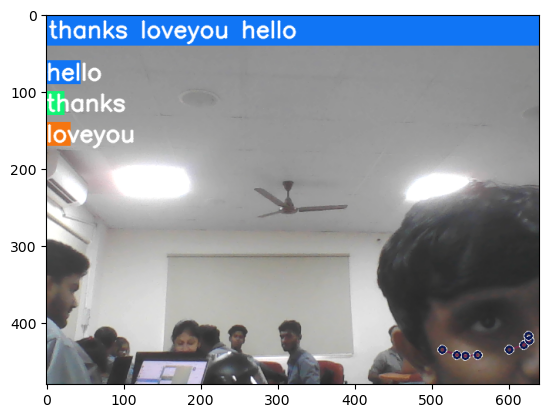

In [31]:
plt.imshow(cv2.cvtColor(prob_viz(res,actions,image,colors),cv2.COLOR_BGR2RGB))

In [33]:
#New detection variables
sequence=[]#Collect 30 frames for prediction
sentence=[]#Concatenate our history of detection
threshold=0.7#To only give result if it is above threshold

#Accessing video through webcm using OpenCV
#We loop thorugh all frames in camera to create video
cap=cv2.VideoCapture(0)#To acccess our webcam 
#here 0 represents device

#Accessing the holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#It checks wheather we are accessing or not
        #Read feed
        ret,frame=cap.read()#It reads our frames
        
        #Make detections
        image,results=mediapipe_detection(frame,holistic)
        
        #Drwing Landmarks
        draw_styled_landmarks(image,results)
        
        #Prediction Logic
        keypoints=extract_keypoints(results)
        sequence.append(keypoints)
        sequence=sequence[-30:]#Grabs last 30 frames
        
        #Run prediction if only 30 sequences collected
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            
            
        #Rendering logic to show prediction in the opencv feed
        #Checking wheather our result is above threshold
        if res[np.argmax(res)].any()>threshold:
            #Checking because we want to check next sequence
            if len(sentence)>0:
                #Checking if current action is not equal to last sentence
                if actions[np.argmax(res)]!=sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
                
        if len(sentence)>5:
            #if sentence is greater than 5 grabbing last 5 value
            sentence=sentence[-5:]
            
        
        #Rendering to show the predection
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,
                       1,(255,255,255),2,cv2.LINE_AA)
        
        #Probabilities
        try:
            image=prob_viz(res,actions,image,colors)
        except TypeError:
            pass
        
        #To showw to screen
        #Rendering
        cv2.imshow("OpenCv Feed",image)

        #To Exit o break the feed
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break #it waits and if we press q breaks the loop
    cap.release()#It releases the webcam
    cv2.destroyAllWindows()#Destroy the cv window

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 15ms/step


In [30]:
#To destroy open cv in middle
cap.release()#It releases the webcam
cv2.destroyAllWindows()#Destroy the cv window

In [ ]:
res[np.argmax(res)]

In [ ]:
np.argmax(res)